<a href="https://colab.research.google.com/github/KrankVegan/Nuevo-Repositorio/blob/main/Tarea_RBG2YUV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea
Conversion de RBG a YUV y vicebersa a partir de funciones

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2

In [ ]:

def load_image(path_image):
    img = cv2.imread(path_image)
    return img[...,::-1] #BGR to RGB

img = load_image('undersea.png')

print(f'Alto : {img.shape[0]}')
print(f'Ancho : {img.shape[1]}')
print(f'Canales : {img.shape[2]}')

Alto : 745
Ancho : 829
Canales : 3


**Formulas**


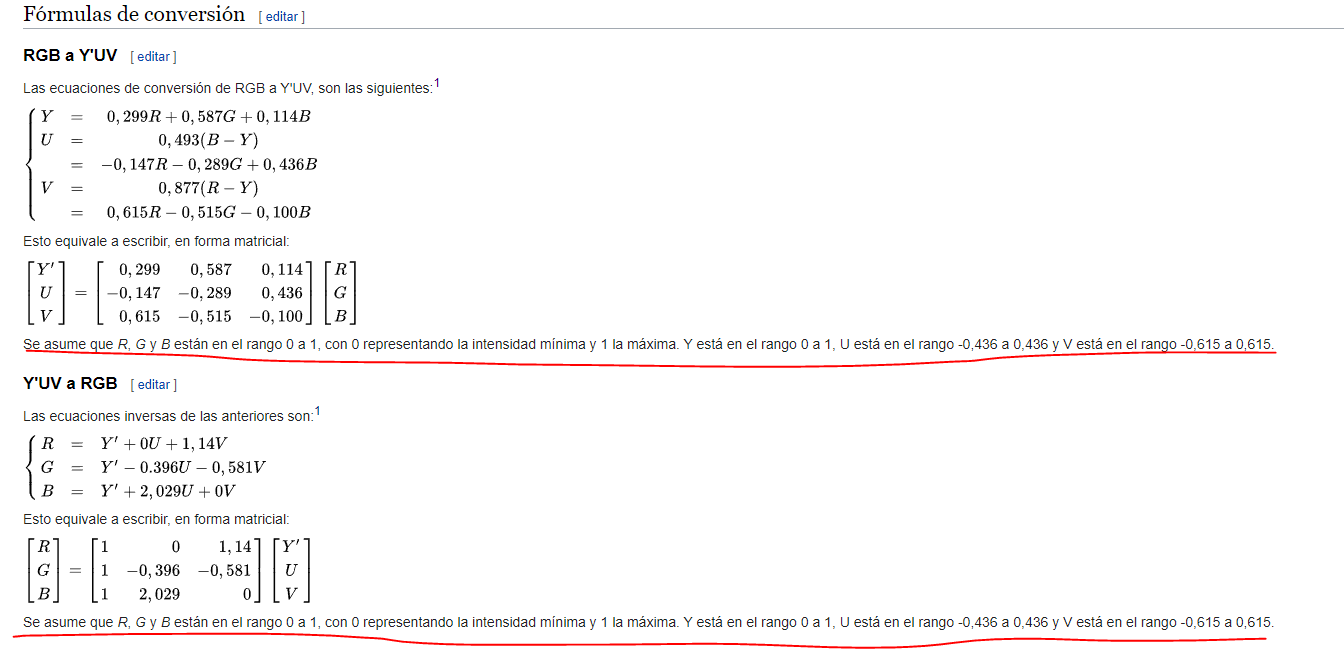

**RGB a YUV**

https://es.wikipedia.org/wiki/YUV

In [ ]:
import numpy as np
def RGB2YUV(img):
    """
    Convert from RGB color space to YUB color space

    Parameters
        img: np.ndarray
    Returns 
        new_img: np.ndarray 
    """
    img = img.astype(np.float32)
    img = img/255

    new_img = np.zeros_like(img)

    
    #Y
    new_img[...,0] = (0.299*img[...,0] + 0.587*img[...,1] + 0.114* img[...,2])

    #U
    new_img[...,1] = (-0.147*img[...,0] - 0.289*img[...,1] + 0.439*img[...,2])
    #V
    new_img[...,2] =  (0.615*img[...,0] -0.515*img[...,1] - 0.1* img[...,2])



    return new_img 

In [ ]:
YUV_img =  RGB2YUV(img) 

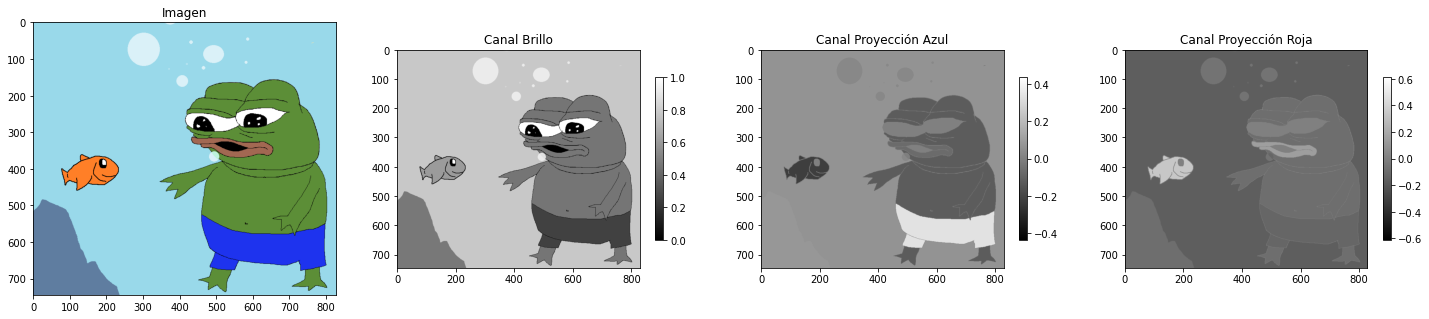

In [ ]:

fig, axs = plt.subplots(1,4,figsize=(25,10))

axs[0].imshow(img)
axs[0].set_title('Imagen')


fig_img = axs[1].imshow(YUV_img[...,0],cmap='gray',vmin=0,vmax=1)
fig.colorbar(fig_img, ax=axs[1],shrink=0.3)
axs[1].set_title('Canal Brillo')


fig_img = axs[2].imshow(YUV_img[...,1],cmap='gray',vmin=-0.436,vmax=0.436)#escala de la formula
fig.colorbar(fig_img, ax=axs[2],shrink=0.3)
axs[2].set_title('Canal Proyección Azul')


fig_img = axs[3].imshow(YUV_img[...,2],cmap='gray',vmin=-0.615,vmax= 0.615)#escala de la formula
fig.colorbar(fig_img, ax=axs[3],shrink=0.3)
axs[3].set_title('Canal Proyección Roja');

Se compara los resultados con la funcion interna RGB2YUV de la libreria cv2

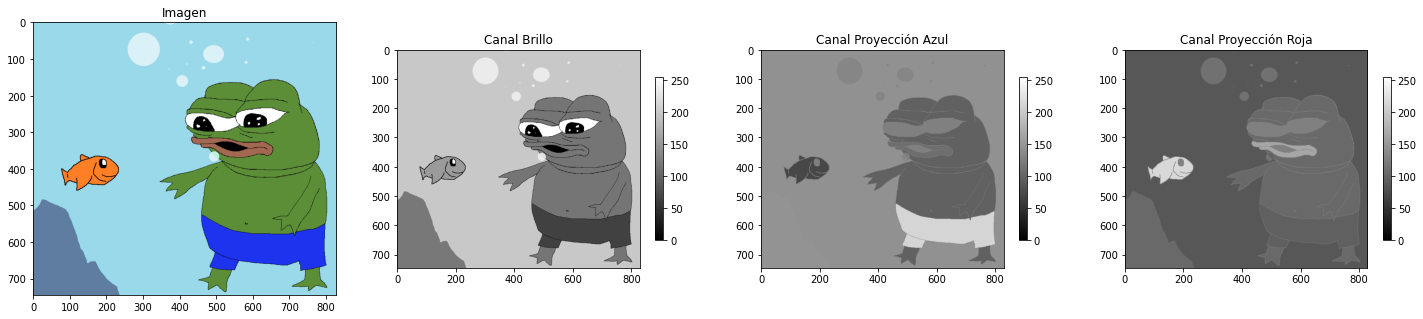

In [ ]:
yuv_img_cv = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
fig, axs = plt.subplots(1,4,figsize=(25,10))

axs[0].imshow(img)
axs[0].set_title('Imagen')


fig_img = axs[1].imshow(yuv_img_cv[...,0],cmap='gray',vmin=0,vmax=255)
fig.colorbar(fig_img, ax=axs[1],shrink=0.3)
axs[1].set_title('Canal Brillo')


fig_img = axs[2].imshow(yuv_img_cv[...,1],cmap='gray',vmin=0,vmax=255)
fig.colorbar(fig_img, ax=axs[2],shrink=0.3)
axs[2].set_title('Canal Proyección Azul')


fig_img = axs[3].imshow(yuv_img_cv[...,2],cmap='gray',vmin=0,vmax=255)
fig.colorbar(fig_img, ax=axs[3],shrink=0.3)
axs[3].set_title('Canal Proyección Roja');

**YUV a RGB**

In [ ]:
import numpy as np
def YUV2RGB(img):
    """
    Convert from YUB color space to RGB color space

    Parameters
        img: np.ndarray
    Returns 
        new_img: np.ndarray 
    """
    img = img.astype(np.float32)
    img = img/255

    new_img = np.zeros_like(img)

    
    #R
    new_img[...,0] = (1*img[...,0] + 0*img[...,1] + 1.14* img[...,2])*255

    #G
    new_img[...,1] = (1*img[...,0] - 0.396*img[...,1] - 0.581*img[...,2])*255
    #B
    new_img[...,2] =  (1*img[...,0] + 2.029*img[...,1] + 0* img[...,2])*255


    return new_img 

In [ ]:
RGB_img =  YUV2RGB(YUV_img)*255

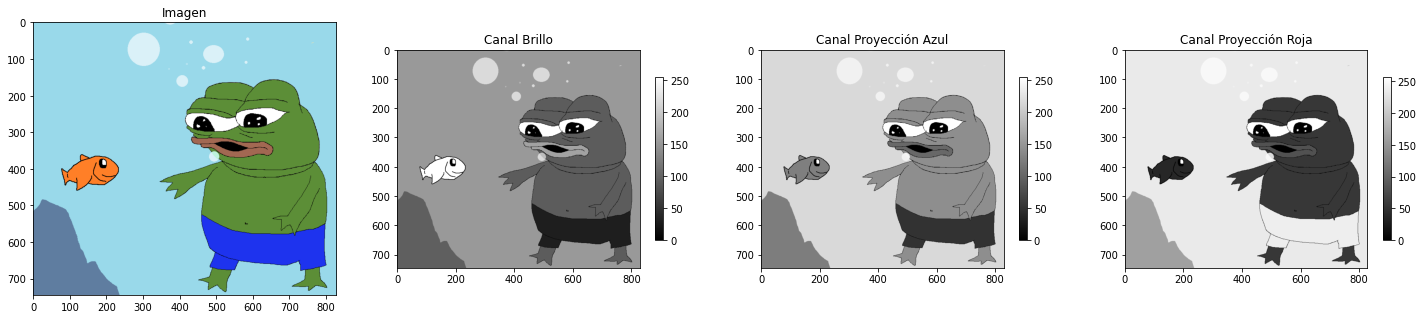

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(25,10))

axs[0].imshow(img)
axs[0].set_title('Imagen')


fig_img = axs[1].imshow(RGB_img[...,0],cmap='gray')
fig.colorbar(fig_img, ax=axs[1],shrink=0.3)
axs[1].set_title('Canal Brillo')


fig_img = axs[2].imshow(RGB_img[...,1],cmap='gray')
fig.colorbar(fig_img, ax=axs[2],shrink=0.3)
axs[2].set_title('Canal Proyección Azul')


fig_img = axs[3].imshow(RGB_img[...,2],cmap='gray')
fig.colorbar(fig_img, ax=axs[3],shrink=0.3)
axs[3].set_title('Canal Proyección Roja');

Comparando con la imagen original que venia en RGB

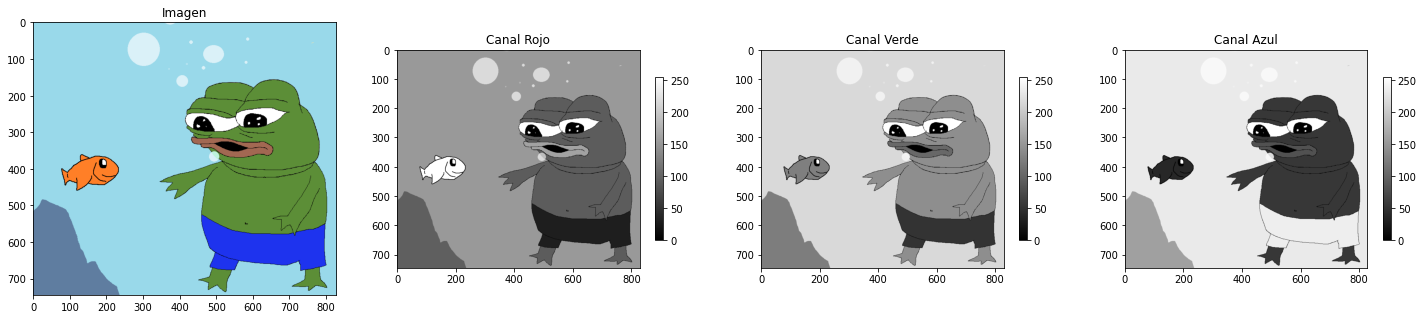

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(25,10))

axs[0].imshow(img)
axs[0].set_title('Imagen')


fig_img = axs[1].imshow(img[...,0],cmap='gray')
fig.colorbar(fig_img, ax=axs[1],shrink=0.3)
axs[1].set_title('Canal Rojo')


fig_img = axs[2].imshow(img[...,1],cmap='gray')
fig.colorbar(fig_img, ax=axs[2],shrink=0.3)
axs[2].set_title('Canal Verde')


fig_img = axs[3].imshow(img[...,2],cmap='gray')
fig.colorbar(fig_img, ax=axs[3],shrink=0.3)
axs[3].set_title('Canal Azul');